In [ ]:
import gc
import pandas as pd
import numpy as np
import os
import lightgbm as lgb
import json
import sklearn.metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from scipy.sparse import dok_matrix, coo_matrix
from sklearn.utils.multiclass import  type_of_target

In [18]:
!gdown --id 196BS6Wq4gcL-JXWPFOryBidS9KC9CtJp
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Downloading...
From: https://drive.google.com/uc?id=196BS6Wq4gcL-JXWPFOryBidS9KC9CtJp
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 31.8kB/s]


In [ ]:
# !cp drive/My\ Drive/eCloudvalley/data1.pkl /content
# !cp drive/My\ Drive/eCloudvalley/data2.pkl /content
# !cp drive/My\ Drive/eCloudvalley/data3.pkl /content
# !cp drive/My\ Drive/eCloudvalley/data4.pkl /content
# !cp drive/My\ Drive/eCloudvalley/data5.pkl /content

# data1 = pd.read_pickle('data1.pkl')
# data2 = pd.read_pickle('data2.pkl')
# data3 = pd.read_pickle('data3.pkl')
# data4 = pd.read_pickle('data4.pkl')
# data5 = pd.read_pickle('data5.pkl')

In [ ]:
!cp drive/My\ Drive/eCloudvalley/data_all.pkl /content
!cp drive/My\ Drive/eCloudvalley/labels_all.pkl /content
data = pd.read_pickle('data_all.pkl')
labels = pd.read_pickle('labels_all.pkl')

In [ ]:
features = [
    # 'reordered_dow_ration', 'reordered_dow', 'reordered_dow_size',
    # 'reordered_prev', 'add_to_cart_order_prev', 'order_dow_prev', 'order_hour_of_day_prev',
    'user_product_reordered_ratio', 'reordered_sum',
    'add_to_cart_order_inverted_mean', 'add_to_cart_order_relative_mean',
    'reorder_prob',
    'last', 'prev1', 'prev2', 'median', 'mean',
    'dep_reordered_ratio', 'aisle_reordered_ratio',
    'aisle_products',
    'aisle_reordered',
    'dep_products',
    'dep_reordered',
    'prod_users_unq', 'prod_users_unq_reordered',
    'order_number', 'prod_add_to_card_mean',
    'days_since_prior_order',
    'order_dow', 'order_hour_of_day',
    'reorder_ration',
    'user_orders', 'user_order_starts_at', 'user_mean_days_since_prior',
    # 'user_median_days_since_prior',
    'user_average_basket', 'user_distinct_products', 'user_reorder_ratio', 'user_total_products',
    'prod_orders', 'prod_reorders',
    'up_order_rate', 'up_orders_since_last_order', 'up_order_rate_since_first_order',
    'up_orders', 'up_first_order', 'up_last_order', 'up_mean_cart_position',
    # 'up_median_cart_position',
    'days_since_prior_order_mean',
    # 'days_since_prior_order_median',
    'order_dow_mean',
    # 'order_dow_median',
    'order_hour_of_day_mean', 'total_buy_ratio',	'total_buy_n5',	'total_buy_n5_ratio'
    # 'order_hour_of_day_median'
]
categories = ['department_id']
embedings = list(str(x) for x in range(32))
features.extend(embedings)
features.extend(categories)
len(features)

79

In [ ]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 256,
    'min_sum_hessian_in_leaf': 20,
    'max_depth': 12,
    'learning_rate': 0.05,
    'feature_fraction': 0.6,
    # 'bagging_fraction': 0.9,
    # 'bagging_freq': 3,
    'verbose': 1
}


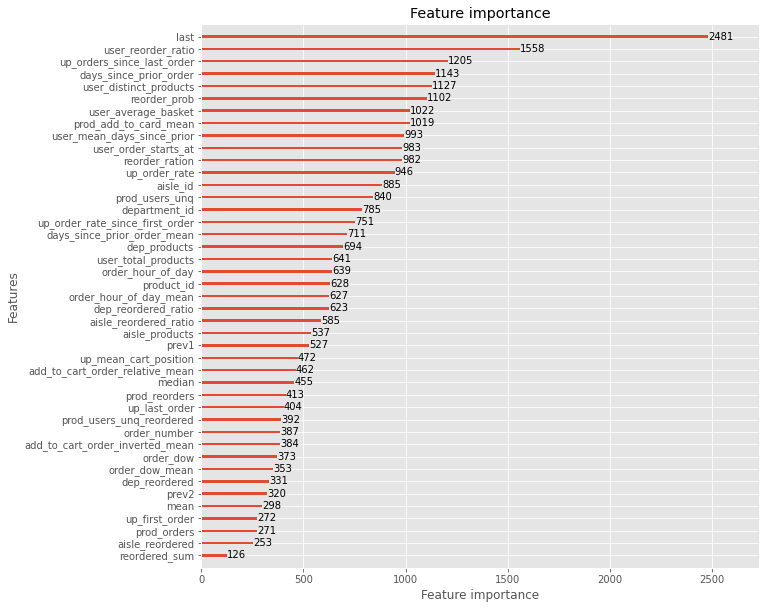

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
lgb.plot_importance(lgb_model, figsize=(10, 10))

In [ ]:
lgb_train = lgb.Dataset(data[features], labels, categorical_feature=[78])
lgb_train.save_binary('lgb_train_all.bin')


In [ ]:
lgb_train = lgb.Dataset('lgb_train_all.bin')
#lgb_val = lgb.Dataset('lgb_train_test.bin')
gbm = lgb.train(params, lgb_train, num_boost_round=380)

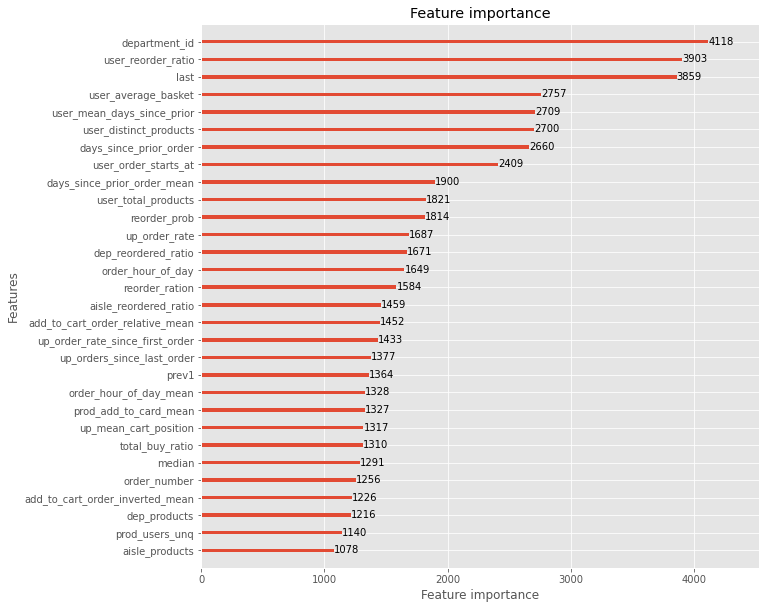

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
lgb.plot_importance(gbm, figsize=(10, 10), max_num_features=30)

In [21]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


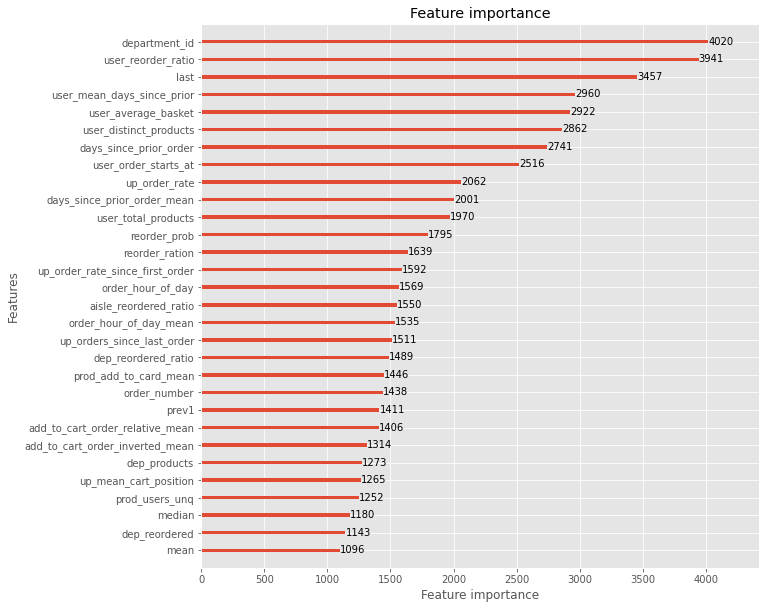

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
lgb.plot_importance(gbm, figsize=(10, 10), max_num_features=30)

In [ ]:
gbm.save_model('model_lgb_all.txt')

In [22]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [ ]:
#!cp lgb_train_all.bin  drive/My\ Drive/eCloudvalley/
!cp model_lgb_all.txt  drive/My\ Drive/eCloudvalley/

In [ ]:
!cp drive/My\ Drive/eCloudvalley/data_val.pkl /content
#!cp drive/My\ Drive/eCloudvalley/data_val2.pkl /content
#!cp drive/My\ Drive/eCloudvalley/chunk_0.pkl /content
#!cp drive/My\ Drive/eCloudvalley/lgb_train.bin /content

In [ ]:
data_val = pd.read_pickle('data_val.pkl')
#data_val2 = pd.read_pickle('data_val2.pkl')


In [20]:
data_val

,user_product_reordered_ratio,reordered_sum,add_to_cart_order_inverted_mean,add_to_cart_order_relative_mean,reorder_prob,last,prev1,prev2,median,mean,dep_reordered_ratio,aisle_reordered_ratio,aisle_products,aisle_reordered,dep_products,dep_reordered,prod_users_unq,prod_users_unq_reordered,order_number,prod_add_to_card_mean,days_since_prior_order,order_dow,order_hour_of_day,reorder_ration,user_orders,user_order_starts_at,user_mean_days_since_prior,user_average_basket,user_distinct_products,user_reorder_ratio,user_total_products,prod_orders,prod_reorders,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,up_orders,up_first_order,up_last_order,up_mean_cart_position,...,total_buy_n5,total_buy_n5_ratio,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,product_id,aisle_id,department_id,order_id,user_id,prediction
0,1.0,0.0,12.000000,0.076923,0.378882,82.0,9999.0,9999.0,9999.0,9999.0000,0.000000,0.000000,1,0.0,2,0.0,161,61.0,11,4.066116,15.0,4,12,0.667355,10,68.0,7.555556,6.700000,39,0.417910,67,484,323.0,0.100000,8,1.111111,1,2,2,1.000000,...,NaN,NaN,-0.534005,0.923381,0.254286,-0.359644,0.949903,0.152821,0.428330,0.142521,0.696405,-0.163492,0.063763,0.673153,-0.431812,-0.327063,0.023732,-0.128016,0.540590,-0.140138,0.283237,-0.566959,-0.414986,-0.618799,-0.682262,1.026910,-0.693585,-0.717572,0.136753,0.976410,0.186198,0.633050,0.234474,-0.022536,17330,27,5,65432,45082,0.022904
1,1.0,0.0,2.000000,0.846154,0.378882,21.0,9999.0,9999.0,9999.0,9999.0000,1.793651,0.857143,28,54.0,68,113.0,161,61.0,64,4.066116,1.0,5,9,0.667355,63,364.0,5.870968,4.634921,159,0.455479,292,484,323.0,0.015873,5,10.500000,1,58,58,11.000000,...,NaN,NaN,-0.534005,0.923381,0.254286,-0.359644,0.949903,0.152821,0.428330,0.142521,0.696405,-0.163492,0.063763,0.673153,-0.431812,-0.327063,0.023732,-0.128016,0.540590,-0.140138,0.283237,-0.566959,-0.414986,-0.618799,-0.682262,1.026910,-0.693585,-0.717572,0.136753,0.976410,0.186198,0.633050,0.234474,-0.022536,17330,27,5,203668,149516,0.032988
2,1.0,16.0,2.235294,0.649977,0.378882,88.0,4.0,11.0,9.5,13.1875,0.978022,0.758242,8,69.0,20,89.0,161,61.0,92,4.066116,4.0,5,16,0.667355,91,336.0,3.733333,5.164835,71,0.848936,470,484,323.0,0.186813,12,1.096386,17,9,79,3.823529,...,NaN,NaN,-0.534005,0.923381,0.254286,-0.359644,0.949903,0.152821,0.428330,0.142521,0.696405,-0.163492,0.063763,0.673153,-0.431812,-0.327063,0.023732,-0.128016,0.540590,-0.140138,0.283237,-0.566959,-0.414986,-0.618799,-0.682262,1.026910,-0.693585,-0.717572,0.136753,0.976410,0.186198,0.633050,0.234474,-0.022536,17330,27,5,1734476,95161,0.067557
3,1.0,0.0,9.000000,0.307692,0.378882,48.0,9999.0,9999.0,9999.0,9999.0000,0.891304,0.586957,17,27.0,32,41.0,161,61.0,47,4.066116,29.0,3,16,0.667355,46,324.0,7.200000,3.804348,98,0.440000,175,484,323.0,0.021739,1,23.000000,1,45,45,4.000000,...,1.0,0.200000,-0.534005,0.923381,0.254286,-0.359644,0.949903,0.152821,0.428330,0.142521,0.696405,-0.163492,0.063763,0.673153,-0.431812,-0.327063,0.023732,-0.128016,0.540590,-0.140138,0.283237,-0.566959,-0.414986,-0.618799,-0.682262,1.026910,-0.693585,-0.717572,0.136753,0.976410,0.186198,0.633050,0.234474,-0.022536,17330,27,5,1627971,49006,0.045297
4,1.0,1.0,14.500000,0.196594,0.378882,109.0,83.0,9999.0,83.0,83.0000,1.375000,0.750000,14,30.0,49,55.0,161,61.0,41,4.066116,6.0,0,11,0.667355,40,358.0,9.179487,27.475000,180,0.836215,1099,484,323.0,0.050000,10,2.222222,2,23,30,3.500000,...,NaN,NaN,-0.534005,0.923381,0.254286,-0.359644,0.949903,0.152821,0.428330,0.142521,0.696405,-0.163492,0.063763,0.673153,-0.431812,-0.327063,0.023732,-0.128016,0.540590,-0.140138,0.283237,-0.566959,-0.414986,-0.618799,-0.682262,1.026910,-0.693585,-0.717572,0.136753,0.976410,0.186198,0.633050,0.234474,-0.022536,17330,27,5,1213682,27900,0.032098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
data_val['prediction'] = gbm.predict(data_val[features])
result = data_val[['product_id', 'order_id', 'prediction']]
result.to_pickle('prediction_lgbm.pkl')

In [ ]:
data_val['prediction'] = lgb_model.predict_proba(data_val[features])[:, 1]
result = data_val[['product_id', 'order_id', 'prediction']]
result.to_pickle('prediction_lgbm.pkl')

In [ ]:
!cp prediction_lgbm.pkl drive/My\ Drive/eCloudvalley/

In [ ]:
import numpy as np
import itertools

def fast_search(prob, dtype=np.float32):
    size = len(prob)
    fk = np.zeros((size + 1), dtype=dtype)
    C = np.zeros((size + 1, size + 1), dtype=dtype)
    S = np.empty((2 * size + 1), dtype=dtype)
    S[:] = np.nan
    for k in range(1, 2 * size + 1):
        S[k] = 1./k
    roots = (prob - 1.0) / prob
    for k in range(size, 0, -1):
        poly = np.poly1d(roots[0:k], True)
        factor = np.multiply.reduce(prob[0:k])
        C[k, 0:k+1] = poly.coeffs[::-1]*factor
        for k1 in range(size + 1):
            fk[k] += (1. + 1.) * k1 * C[k, k1]*S[k + k1]
        for i in range(1, 2*(k-1)):
            S[i] = (1. - prob[k-1])*S[i] + prob[k-1]*S[i+1]

    return fk

In [ ]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
import multiprocessing

none_product = 50000

def applyParallel(dfGrouped, func):
    retLst = Parallel(n_jobs=multiprocessing.cpu_count())(delayed(func)(group) for name, group in dfGrouped)
    return pd.concat(retLst)

def create_products(df):
    # print(df.product_id.values.shape)
    products = df.product_id.values
    prob = df.prediction.values

    sort_index = np.argsort(prob)[::-1]

    values = fast_search(prob[sort_index][0:80], dtype=np.float64)

    index = np.argmax(values)

    print('iteration', df.shape[0], 'optimal value', index)

    best = " ".join(map(lambda x: str(x) if x != none_product else 'None', products[sort_index][0:index]))
    df = df[0:1]
    df.loc[:, 'products'] = best
    return df

In [ ]:
threshold = 0.02
data = pd.read_pickle('prediction_lgbm.pkl')

data['not_a_product'] = 1. - data.prediction

gp = data.groupby('order_id')['not_a_product'].apply(lambda x: np.multiply.reduce(x.values)).reset_index()
gp.rename(columns={'not_a_product': 'prediction'}, inplace=True)
gp['product_id'] = none_product

data = pd.concat([data, gp], axis=0)
data.product_id = data.product_id.astype(np.uint32)

#add none products to orders filtering out
none = set(np.unique(data.order_id)) - set(np.unique(data.loc[data.prediction > threshold, ['order_id', 'prediction', 'product_id']].order_id))
none_list = [[n, 'None'] for n in none]
none_df = pd.DataFrame(none_list, columns = ['order_id', 'products'])

data = data.loc[data.prediction > threshold, ['order_id', 'prediction', 'product_id']]

# Group products per order here
df_order = applyParallel(data.groupby(data.order_id), create_products).reset_index()[['order_id', 'products']]


df_order_all = pd.concat([df_order, none_df]).sort_values(by='order_id')
df_order_all.order_id = df_order_all.order_id.astype(int)
df_order_all.to_csv('sub_002.csv', index=False)

# df_data = applyParallel(data.groupby(data.order_id), create_products).reset_index()

# df_data[['order_id', 'products']].to_csv('sub_0061.csv', index=False)
!cp sub_002.csv drive/My\ Drive/eCloudvalley
!kaggle competitions submit -c instacart-market-basket-analysis -f sub_002.csv -m "new features"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [19]:
!kaggle competitions submit -c instacart-market-basket-analysis -f sub_002.csv -m "new features"

100% 4.32M/4.32M [00:06<00:00, 657kB/s]
Successfully submitted to Instacart Market Basket Analysis

In [ ]:
df_order_all.to_csv('sub_020.csv', index=False)

# df_data = applyParallel(data.groupby(data.order_id), create_products).reset_index()

# df_data[['order_id', 'products']].to_csv('sub_0061.csv', index=False)
!cp sub_020.csv drive/My\ Drive/eCloudvalley
!kaggle competitions submit -c instacart-market-basket-analysis -f sub_020.csv -m "Message"

100% 3.11M/3.11M [00:13<00:00, 247kB/s]
Successfully submitted to Instacart Market Basket Analysis

In [ ]:
threshold = 0.01
data = pd.read_pickle('prediction_lgbm3.pkl')

data['not_a_product'] = 1. - data.prediction

gp = data.groupby('order_id')['not_a_product'].apply(lambda x: np.multiply.reduce(x.values)).reset_index()
gp.rename(columns={'not_a_product': 'prediction'}, inplace=True)
gp['product_id'] = none_product

data = pd.concat([data, gp], axis=0)
data.product_id = data.product_id.astype(np.uint32)

#add none products to orders filtering out
none = set(np.unique(data.order_id)) - set(np.unique(data.loc[data.prediction > threshold, ['order_id', 'prediction', 'product_id']].order_id))
none_list = [[n, 'None'] for n in none]
none_df = pd.DataFrame(none_list, columns = ['order_id', 'products'])

data = data.loc[data.prediction > threshold, ['order_id', 'prediction', 'product_id']]

# Group products per order here
df_order = applyParallel(data.groupby(data.order_id), create_products).reset_index()[['order_id', 'products']]

df_order_all = pd.concat([df_order, none_df]).sort_values(by='order_id')
df_order_all.order_id = df_order_all.order_id.astype(int)
df_order_all.to_csv('sub_0001.csv', index=False)

# df_data = applyParallel(data.groupby(data.order_id), create_products).reset_index()

# df_data[['order_id', 'products']].to_csv('sub_0061.csv', index=False)
!cp sub_0001.csv drive/My\ Drive/eCloudvalley
!kaggle competitions submit -c instacart-market-basket-analysis -f sub_0001.csv -m "with embedding"

100% 4.33M/4.33M [00:07<00:00, 595kB/s]
Successfully submitted to Instacart Market Basket Analysis

In [ ]:
df_order_all

NameError: ignored

In [ ]:
!kaggle competitions submit -c instacart-market-basket-analysis -f sub_050.csv -m "Message"

100% 1.54M/1.54M [00:10<00:00, 154kB/s]
Successfully submitted to Instacart Market Basket Analysis

In [ ]:
none_df = pd.DataFrame(none_list, columns = ['order_id', 'products'])
df_order_all = pd.concat([df_order, none_df]).sort_values(by='order_id')
df_order_all.to_csv('sub.csv', index=False)

In [ ]:
df_order_all

,order_id,products
0,17,21463 None
1,34,12016 30353 22819 22828 10132 30639 46979 3081...
2,137,18465 16797 47630 11688
3,182,28051 41774 23645 6972 42265 3397 34824 47672 ...
4,257,35734 13176 47042 38067 46650 14429 11755 3947...
...,...,...
74995,3420740,41427 27104 41006 9337 16616 32864 16797 14447...
74996,3420877,11408 21903 45007 23029 39275 8670 38159 40593...
74997,3420888,44683 31563 46906 28204 7963 38067 22935 10111...
74998,3420989,None


In [ ]:
!kaggle competitions submit -c instacart-market-basket-analysis -f sub.csv -m "Message"

100% 3.99M/3.99M [00:09<00:00, 441kB/s]
Successfully submitted to Instacart Market Basket Analysis

In [ ]:
data = pd.read_pickle('prediction_lgbm.pkl')

data['not_a_product'] = 1. - data.prediction

In [ ]:
np.multiply.reduce(data[data.order_id == 3100792].not_a_product.values)

0.05638199403715743

In [ ]:
gp = data.groupby('order_id')['not_a_product'].apply(lambda x: np.multiply.reduce(x.values)).reset_index()
gp.not_a_product

,order_id,not_a_product
0,17,3.365748e-01
1,34,3.548784e-10
2,137,5.112964e-02
3,182,4.720600e-05
4,257,4.971254e-05
...,...,...
74995,3420740,4.395451e-22
74996,3420877,3.377135e-14
74997,3420888,3.035082e-03
74998,3420989,4.430483e-01


In [ ]:
data = pd.read_pickle('prediction_lgbm.pkl')

data['not_a_product'] = 1. - data.prediction

gp = data.groupby('order_id')['not_a_product'].apply(lambda x: np.multiply.reduce(x.values)).reset_index()
gp.rename(columns={'not_a_product': 'prediction'}, inplace=True)
gp['product_id'] = none_product

data = pd.concat([data, gp], axis=0)
data.product_id = data.product_id.astype(np.uint32)

np.unique(data.loc[data.prediction > 0.5, ['order_id', 'prediction', 'product_id']].order_id).shape

(46074,)

In [ ]:
gp[gp.order_id == 3100792]

,order_id,prediction,product_id
68062,3100792,0.056382,50000


In [ ]:
none = set(np.unique(data.order_id)) - set(np.unique(data.loc[data.prediction > 0.2, ['order_id', 'prediction', 'product_id']].order_id))
none_list = [[n, 'None'] for n in none]
none_list = pd.DataFrame(none_list, columns = ['order_id', 'product_id'])
none_list.dtypes

order_id       int64
product_id    object
dtype: object

In [ ]:
df_order.dtypes

index           int64
order_id       uint64
prediction    float64
product_id     uint32
products       object
dtype: object

In [ ]:
data[data.order_id == 3100792]

,product_id,order_id,prediction,not_a_product
1472392,6300,3100792,0.015181,0.984819
1472393,11865,3100792,0.007408,0.992592
1472394,37935,3100792,0.004859,0.995141
1472395,11168,3100792,0.016316,0.983684
1472396,24631,3100792,0.004365,0.995635
...,...,...,...,...
1472668,38303,3100792,0.011691,0.988309
1472669,1035,3100792,0.009803,0.990197
1472670,28715,3100792,0.008192,0.991808
1472671,19048,3100792,0.006088,0.993912


In [ ]:
def filtering(x):
  

In [ ]:
none_product = 50000

data = pd.read_pickle('prediction_lgbm.pkl')

data['not_a_product'] = 1. - data.prediction

gp = data.groupby('order_id')['not_a_product'].apply(lambda x: np.multiply.reduce(x.values)).reset_index()
gp.rename(columns={'not_a_product': 'prediction'}, inplace=True)
gp['product_id'] = none_product

data = pd.concat([data, gp], axis=0)
data.product_id = data.product_id.astype(np.uint32)


df = data.loc[data.prediction > 0.2, ['order_id', 'prediction', 'product_id']]

none = set(np.unique(data.order_id)) - set(np.unique(data.loc[data.prediction > 0.2, ['order_id', 'prediction', 'product_id']].order_id))
none_list = [[n, 'None'] for n in none]
none_df = pd.DataFrame(none_list, columns = ['order_id', 'product_id'])

    # Group products per order here
df_order = applyParallel(df.groupby(df.order_id), create_products_faron).reset_index()[['order_id', 'products']]

df_order_all = pd.concat([df_order, none_df]).sort_values(by='order_id')

df_order_all.to_csv('sub.csv', index=False)
!cp sub.csv drive/My\ Drive/eCloudvalley

,product_id,order_id,prediction,not_a_product
0,17330,65432,2.314651e-02,0.976853
1,27407,65432,5.221958e-02,0.947780
2,35419,65432,9.640588e-02,0.903594
3,196,65432,5.712567e-02,0.942874
4,44635,65432,4.853054e-02,0.951469
...,...,...,...,...
74995,50000,3420740,4.395451e-22,NaN
74996,50000,3420877,3.377135e-14,NaN
74997,50000,3420888,3.035082e-03,NaN
74998,50000,3420989,4.430483e-01,NaN


In [ ]:
none_product = 50000

data = pd.read_pickle('prediction_lgbm.pkl')

data['not_a_product'] = 1. - data.prediction

gp = data.groupby('order_id')['not_a_product'].apply(lambda x: np.multiply.reduce(x.values)).reset_index()
gp.rename(columns={'not_a_product': 'prediction'}, inplace=True)
gp['product_id'] = none_product

data = pd.concat([data, gp], axis=0)
data.product_id = data.product_id.astype(np.uint32)


df = data.loc[data.prediction > 0.061, ['order_id', 'prediction', 'product_id']]

    # Group products per order here
df_order = applyParallel(df.groupby(df.order_id), create_products_faron).reset_index()

df_order[['order_id', 'products']].to_csv('sub.csv', index=False)
!cp sub.csv drive/My\ Drive/eCloudvalley

KeyboardInterrupt: ignored

Downloading...
From: https://drive.google.com/uc?id=196BS6Wq4gcL-JXWPFOryBidS9KC9CtJp
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 29.9kB/s]


In [ ]:
!kaggle competitions submit -c instacart-market-basket-analysis -f sub.csv -m "Message"